Dataset Head:
          country  year iso_code  population  gdp  biofuel_cons_change_pct  \
0  ASEAN (Ember)  2000      NaN         NaN  NaN                      NaN   
1  ASEAN (Ember)  2001      NaN         NaN  NaN                      NaN   
2  ASEAN (Ember)  2002      NaN         NaN  NaN                      NaN   
3  ASEAN (Ember)  2003      NaN         NaN  NaN                      NaN   
4  ASEAN (Ember)  2004      NaN         NaN  NaN                      NaN   

   biofuel_cons_change_twh  biofuel_cons_per_capita  biofuel_consumption  \
0                      NaN                      NaN                  NaN   
1                      NaN                      NaN                  NaN   
2                      NaN                      NaN                  NaN   
3                      NaN                      NaN                  NaN   
4                      NaN                      NaN                  NaN   

   biofuel_elec_per_capita  ...  solar_share_elec  solar_share_en

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()



Summary Statistics:
                year    population           gdp  biofuel_cons_change_pct  \
count  22012.000000  1.812300e+04  1.111300e+04              1747.000000   
mean    1974.213247  1.053096e+08  3.585114e+11                46.091694   
std       35.058653  4.640460e+08  2.411179e+12               274.616745   
min     1900.000000  1.833000e+03  1.642060e+08              -100.000000   
25%     1946.000000  1.712404e+06  1.365898e+10                -0.616500   
50%     1984.000000  6.991543e+06  4.167411e+10                 8.179000   
75%     2003.000000  2.557688e+07  1.744295e+11                26.508500   
max     2022.000000  7.975105e+09  1.136302e+14              5659.328000   

       biofuel_cons_change_twh  biofuel_cons_per_capita  biofuel_consumption  \
count              2687.000000              2302.000000          2767.000000   
mean                  2.719074               133.558459            38.068209   
std                  10.057018               264.7078

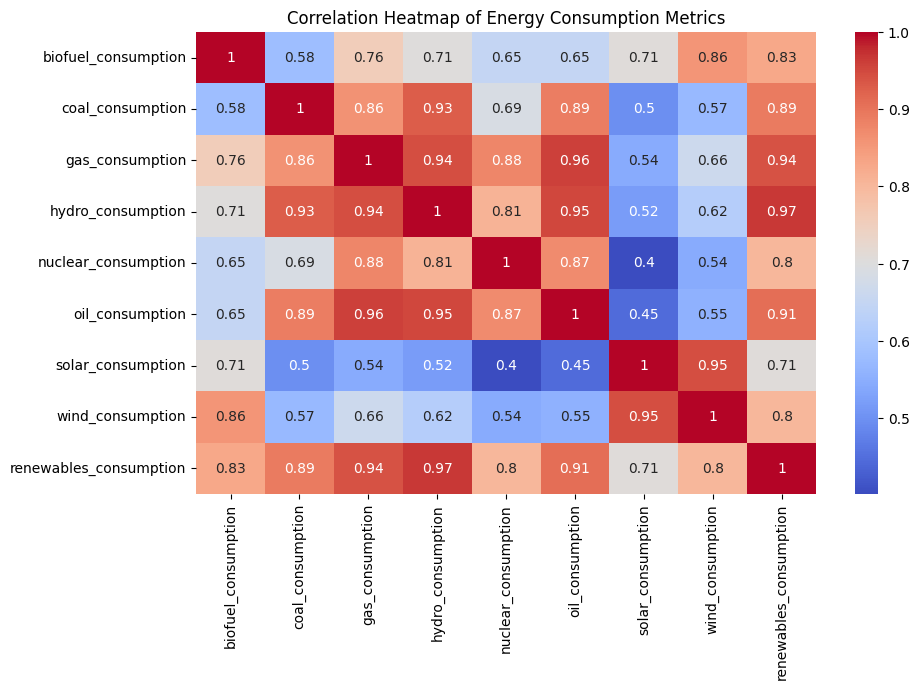

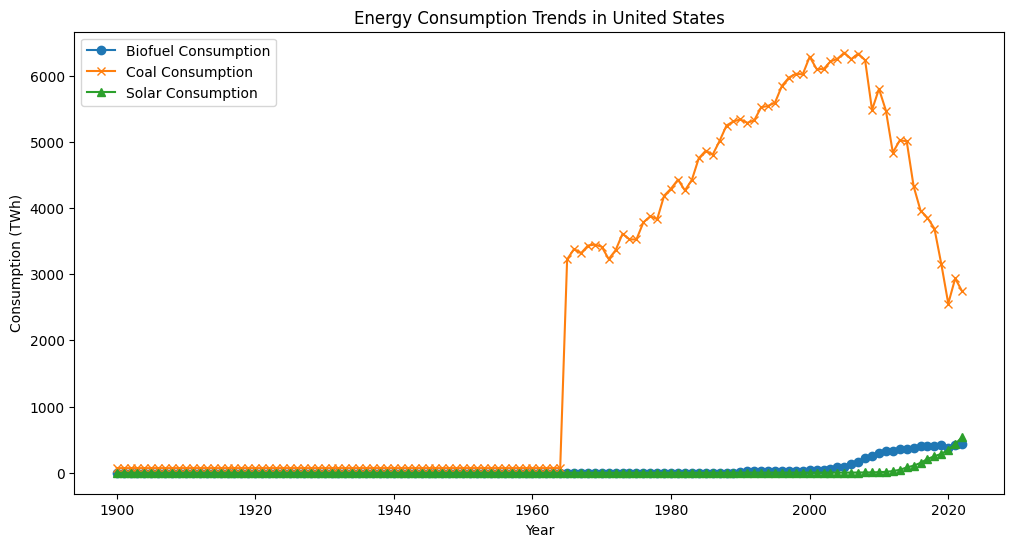


Top 10 Countries by Renewable Energy Share in 2022
                              country  renewables_share_energy
14590                          Norway                   71.628
18759                          Sweden                   53.312
2975                           Brazil                   48.735
13420                     New Zealand                   43.070
5509                          Denmark                   43.043
7231                          Finland                   38.497
18056                   South America                   37.783
1799                          Austria                   36.608
18290  South and Central America (EI)                   34.974
5840              Eastern Africa (EI)                   34.049


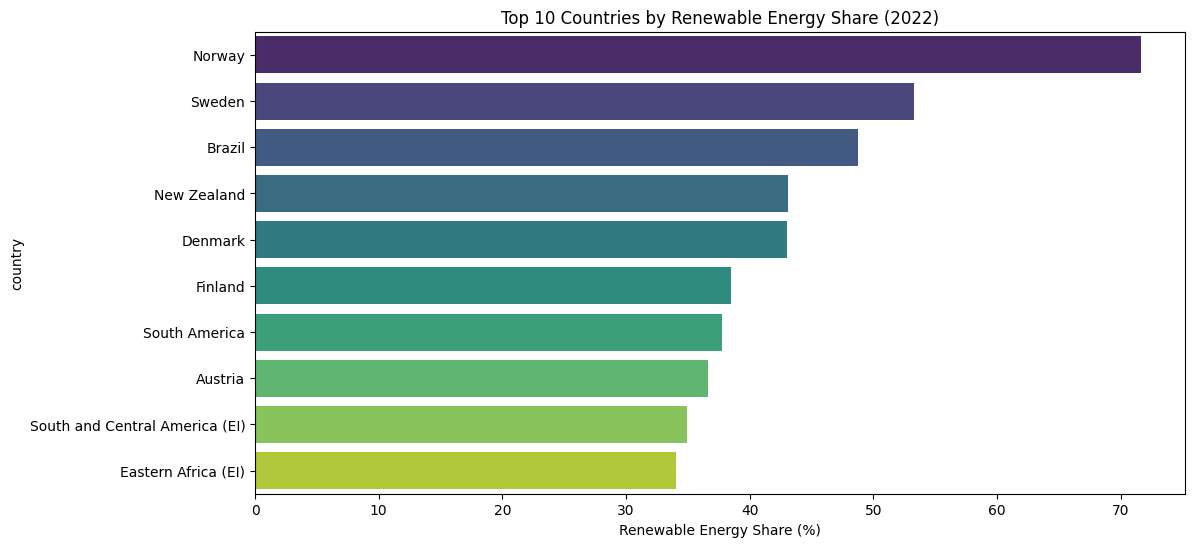

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/kaggle/input/world-energy-consumption/World Energy Consumption.csv'  # Update this path

df = pd.read_csv(file_path)

# Display basic dataset information
print("Dataset Head:\n", df.head())
print("\nColumns in Dataset:\n", df.columns.tolist())
print("\nBasic Info:\n")
df.info()
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe())

# Handle missing data (Example: Fill with median or drop rows)
df.fillna(df.median(numeric_only=True), inplace=True)

# Example analysis: Correlation heatmap of select energy columns
energy_cols = ['biofuel_consumption', 'coal_consumption', 'gas_consumption',
               'hydro_consumption', 'nuclear_consumption', 'oil_consumption',
               'solar_consumption', 'wind_consumption', 'renewables_consumption']

# Filter out columns that may not exist
energy_cols = [col for col in energy_cols if col in df.columns]

plt.figure(figsize=(10, 6))
sns.heatmap(df[energy_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Energy Consumption Metrics')
plt.show()

# Plotting time series data for a specific country (Example: 'United States')
country = 'United States'
df_country = df[df['country'] == country]

if not df_country.empty:
    plt.figure(figsize=(12, 6))
    plt.plot(df_country['year'], df_country['biofuel_consumption'], label='Biofuel Consumption', marker='o')
    plt.plot(df_country['year'], df_country['coal_consumption'], label='Coal Consumption', marker='x')
    plt.plot(df_country['year'], df_country['solar_consumption'], label='Solar Consumption', marker='^')
    plt.title(f"Energy Consumption Trends in {country}")
    plt.xlabel("Year")
    plt.ylabel("Consumption (TWh)")
    plt.legend()
    plt.show()
else:
    print(f"No data found for country: {country}")

# Example analysis: Top countries by renewable energy share in the most recent year
latest_year = df['year'].max()
renewable_df = df[df['year'] == latest_year][['country', 'renewables_share_energy']].dropna()

# Top 10 countries
top_renewables = renewable_df.sort_values(by='renewables_share_energy', ascending=False).head(10)
print("\nTop 10 Countries by Renewable Energy Share in", latest_year)
print(top_renewables)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_renewables, x='renewables_share_energy', y='country', palette='viridis')
plt.title(f"Top 10 Countries by Renewable Energy Share ({latest_year})")
plt.xlabel("Renewable Energy Share (%)")
plt.show()

# Save cleaned data if necessary
df.to_csv('cleaned_energy_data.csv', index=False)
